<a href="https://colab.research.google.com/github/elarchi2005/IA_2025/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de personalidades en X con K-Means y Silhouette


- `op`:  Openness
- `co`: c onscientiousness
- `ex`: Extraversión
- `ag`: Amabilidad
- `ne`: Neuroticismo


1. Cargar y explorar el dataset.
2. Escalar los rasgos de personalidad.
3. Probar diferentes valores de k usando K-Means (distancia euclidiana).
4. Calcular el Silhouette Score para cada k (de 2 a 10).
5. Elegir el mejor k según Silhouette.
6. Entrenar el modelo final de K-Means con ese k.
7. Visualizar los clusters y analizar los grupos de personalidad.



## 1. Importar librerías

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 120

## 2. Cargar el dataset

In [2]:

df = pd.read_csv('/content/analisis.csv')

# Mostrar las primeras filas para verificar que se cargó bien
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


## 3. Exploración básica de los datos

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [3]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
op,140.0,44.414591,8.425723,30.020465,38.206484,44.507091,49.365923,71.696129
co,140.0,22.977135,5.816851,7.852756,19.740299,22.466718,26.091606,49.637863
ex,140.0,40.764428,7.185246,18.693542,36.095722,41.457492,45.197769,59.824844
ag,140.0,22.918528,7.657122,9.305985,17.050993,21.384554,28.678866,40.583162
ne,140.0,8.000098,3.039248,1.030213,6.086144,7.839722,9.758189,23.978462
wordcount,140.0,98.715484,44.714071,5.020800,66.218475,94.711400,119.707925,217.183200
categoria,140.0,4.050000,2.658839,1.000000,2.000000,3.500000,7.000000,9.000000


## 4. Distribución de los rasgos de personalidad (Big Five)

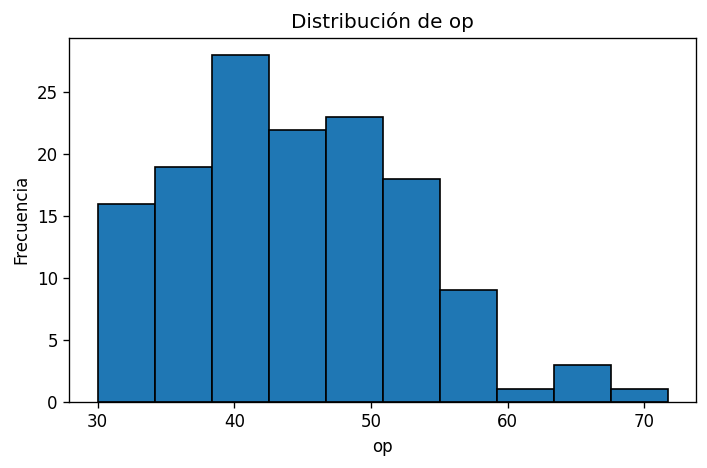

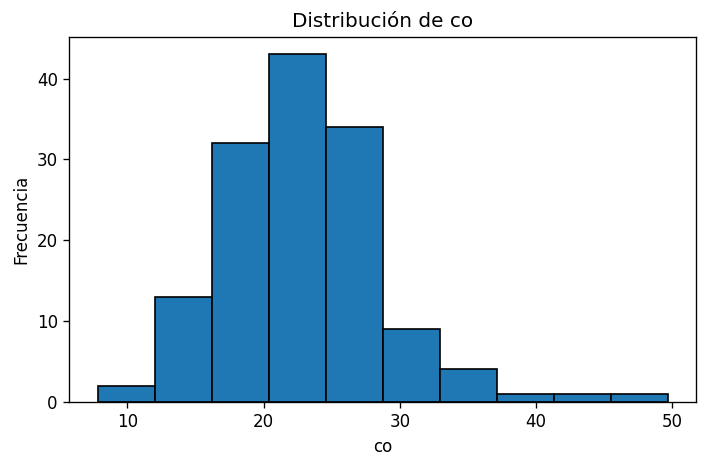

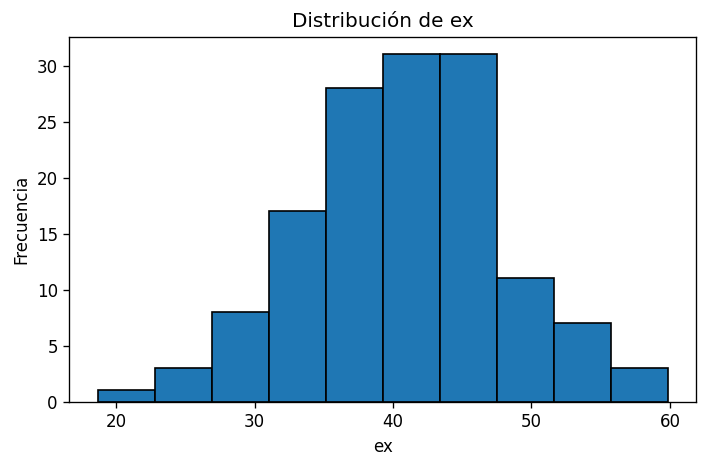

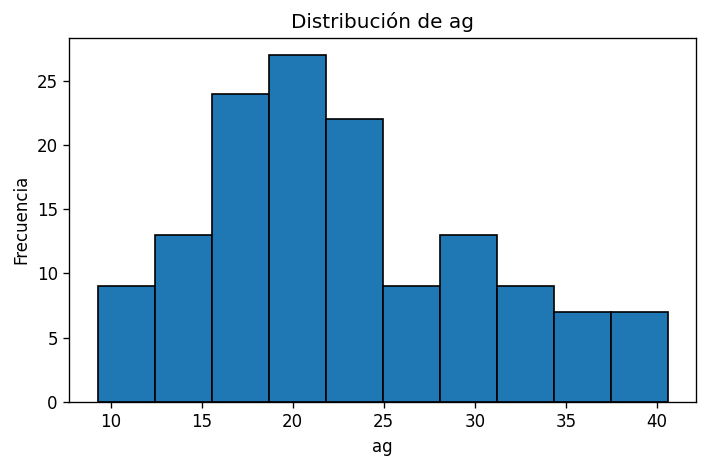

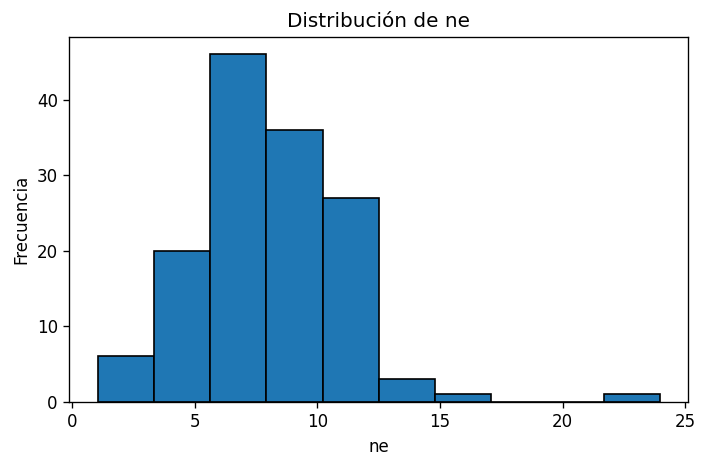

In [6]:

big_five_cols = ['op', 'co', 'ex', 'ag', 'ne']
for col in big_five_cols:
    plt.figure()
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

## 5. Preparar los datos y escalar (StandardScaler)

In [7]:

X = df[big_five_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.20499609,  0.89227886,  0.16542841,  0.84561194,  0.6080745 ],
       [ 0.06816102, -0.42292159, -0.39464568,  0.1783249 ,  0.78005819],
       [-0.31930346, -1.59276314, -0.2464589 ,  1.53701373,  0.27634669],
       [-0.48090044, -1.3111838 ,  1.61646035,  1.06997636, -0.98001978],
       [-0.92309481, -0.57537172,  1.08475959,  1.07741005, -0.2292087 ]])




- Entrenamos un modelo K-Means con distancia euclidiana (la que usa por defecto).
- Calculamos el Silhouette Score.
- Guardamos el resultado para comparar.
El Silhouette Score nos dice qué tan bien separados están los clusters:
- Cerca de 1 → muy bien separados.
- Cerca de 0 → clusters se mezclan.
- Menor que 0 → mala asignación de puntos.

In [22]:

k_values = list(range(2,11 ))

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    labels = kmeans.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, labels)

    silhouette_scores.append(sil_score)

results_sil = pd.DataFrame({'k': k_values, 'silhouette': silhouette_scores})
results_sil

,k,silhouette
0,2,0.306465
1,3,0.253438
2,4,0.208011
3,5,0.217616
4,6,0.192670
5,7,0.196019
6,8,0.185442
7,9,0.182445
8,10,0.194704


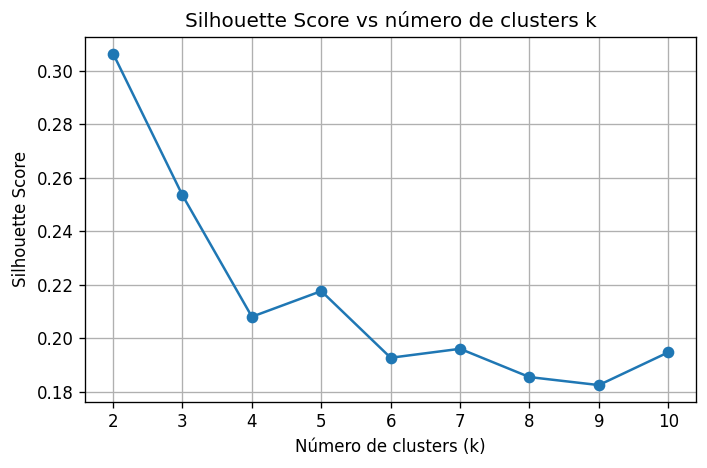

In [23]:

plt.figure()
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs número de clusters k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Elegir el mejor k según Silhouette

In [11]:

import numpy as np

best_index = int(np.argmax(silhouette_scores))
best_k = k_values[best_index]

print('Mejor valor de k según Silhouette:', best_k)
print('Silhouette máximo:', silhouette_scores[best_index])

Mejor valor de k según Silhouette: 2
Silhouette máximo: 0.30646465164951453


## 8. Entrenar el modelo final de K-Means con el mejor k

In [12]:

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

df['cluster'] = kmeans_final.labels_

df[['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'cluster']].head()

,usuario,op,co,ex,ag,ne,cluster
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,1
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,0
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,0
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,0


## 9. Tamaño de cada cluster

In [13]:

cluster_sizes = df['cluster'].value_counts().sort_index()
cluster_sizes

,count
cluster,
0,52
1,88


## 10. Rasgos promedio por cluster (perfil de personalidad)

In [14]:

cluster_means = df.groupby('cluster')[big_five_cols].mean()
cluster_means

,op,co,ex,ag,ne
cluster,,,,,
0,37.145896,19.328552,46.323140,30.784263,7.447122
1,48.709729,25.133116,37.479735,18.270594,8.326856


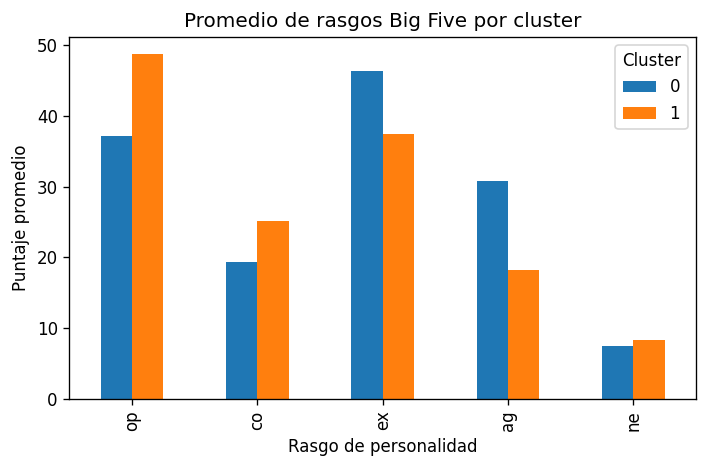

In [15]:

cluster_means.T.plot(kind='bar')
plt.title('Promedio de rasgos Big Five por cluster')
plt.xlabel('Rasgo de personalidad')
plt.ylabel('Puntaje promedio')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## 11. Visualización 2D de los clusters (ex vs ne)

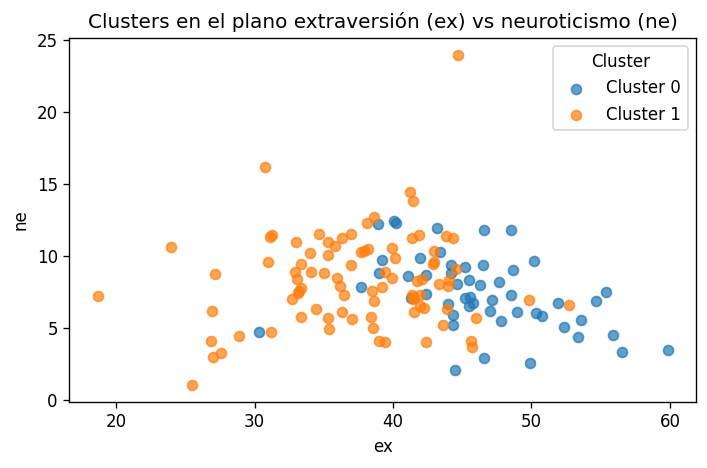

In [16]:

x_col = 'ex'
y_col = 'ne'

plt.figure()
for c in range(best_k):
    mask = df['cluster'] == c
    plt.scatter(df.loc[mask, x_col], df.loc[mask, y_col], label=f'Cluster {c}', alpha=0.7)

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Clusters en el plano extraversión (ex) vs neuroticismo (ne)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()